In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from ISLP import load_data

In [2]:
college = pd.read_csv("College.csv")
college


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
college2 = pd.read_csv("College.csv", index_col = 0)
college3 = college.rename({'Unnamed: 0': 'College'},
axis=1)
college3 = college3.set_index('College')

In [4]:
college = college3

In [5]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


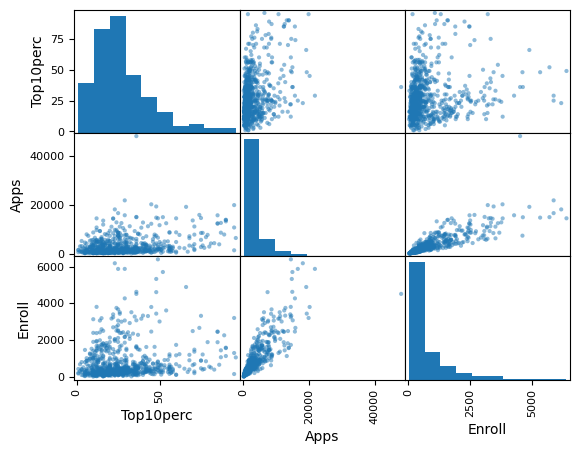

In [7]:
pd.plotting.scatter_matrix(college[["Top10perc", "Apps", "Enroll"]]);

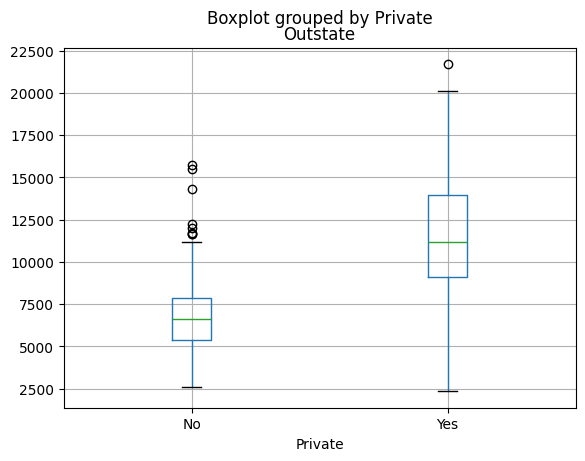

In [9]:
college.boxplot("Outstate", "Private");

In [19]:
college['Elite'] = pd.cut(college['Top10perc'],bins=2,labels=['No','Yes'])
college[["Elite"]]

,Elite
College,
Abilene Christian University,No
Adelphi University,No
Adrian College,No
Agnes Scott College,Yes
Alaska Pacific University,No
...,...
Worcester State College,No
Xavier University,No
Xavier University of Louisiana,No


In [23]:
college["Elite"].value_counts()

Elite
No     687
Yes     90
Name: count, dtype: int64

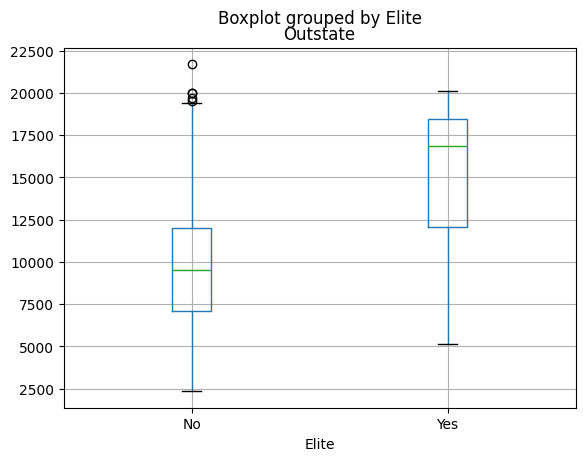

In [25]:
college.boxplot("Outstate", "Elite");

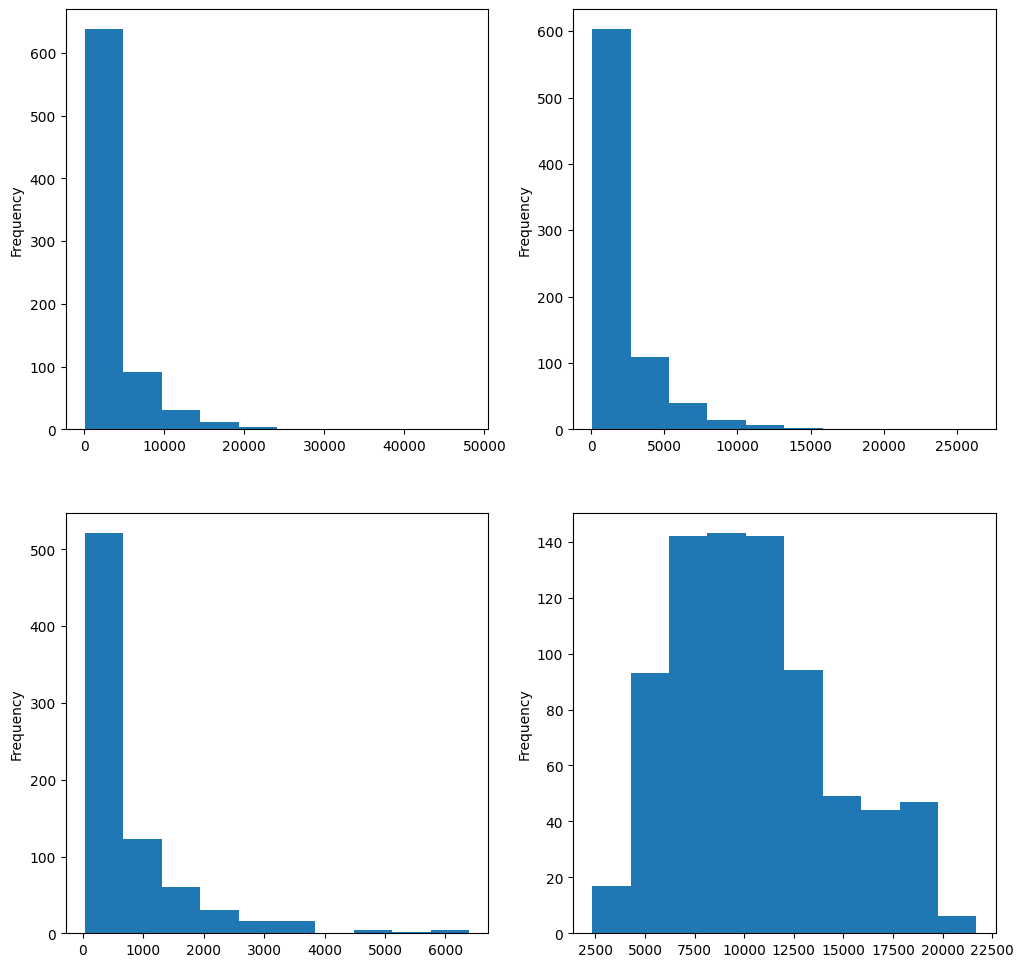

In [36]:
fig, axes =plt.subplots(nrows=2,ncols= 2,figsize=(12,12))
college['Apps'].plot.hist(ax=axes[0,0])
college['Accept'].plot.hist(ax=axes[0,1])
college['Enroll'].plot.hist(ax=axes[1,0])
college['Outstate'].plot.hist(ax=axes[1,1]);

In [37]:
college.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Private      777 non-null    object  
 1   Apps         777 non-null    int64   
 2   Accept       777 non-null    int64   
 3   Enroll       777 non-null    int64   
 4   Top10perc    777 non-null    int64   
 5   Top25perc    777 non-null    int64   
 6   F.Undergrad  777 non-null    int64   
 7   P.Undergrad  777 non-null    int64   
 8   Outstate     777 non-null    int64   
 9   Room.Board   777 non-null    int64   
 10  Books        777 non-null    int64   
 11  Personal     777 non-null    int64   
 12  PhD          777 non-null    int64   
 13  Terminal     777 non-null    int64   
 14  S.F.Ratio    777 non-null    float64 
 15  perc.alumni  777 non-null    int64   
 16  Expend       777 non-null    int64   
 17  Grad.Rate    777 non-null 

In [74]:
corr_matrix = college.select_dtypes(include=['int64', 'float64']).corr()

for a, b in itertools.combinations(corr_matrix.columns, 2):
    if corr_matrix.loc[a, b] >= 0.9:
        print(f"{a} ↔ {b}: {corr_matrix.loc[a, b]:.3f}")

Apps ↔ Accept: 0.943
Accept ↔ Enroll: 0.912
Enroll ↔ F.Undergrad: 0.965


Крч эти штуки сильно коррелируют, то есть почти одинаковы, а значит можно выкинуть че-то из этого, давайте оставить Accept, тк apps - странная мера, Enroll - тоже самое что и Accept, а F.undergrad напрямую зависит от Enroll, так что логичнее всего оставить Accept

Работа с Auto.csv

In [114]:
Auto = pd.read_csv("Auto.csv")
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Как видим все quntitative, кроме name

In [115]:
Auto = Auto.replace('?', np.nan)
Auto = Auto.dropna()
Auto['horsepower'] = Auto['horsepower'].astype(int)
Auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 30.6+ KB


In [116]:
Auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [119]:
Auto_part = Auto.drop(Auto.index[10:85])
Auto_part.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000,317.000000
mean,24.374763,5.381703,187.880126,101.003155,2938.854890,15.704101,77.123028,1.599369
std,7.872565,1.658135,100.169973,36.003208,811.640668,2.719913,3.127158,0.819308
min,11.000000,3.000000,68.000000,46.000000,1649.000000,8.500000,70.000000,1.000000
25%,18.000000,4.000000,101.000000,75.000000,2215.000000,14.000000,75.000000,1.000000
50%,23.900000,4.000000,146.000000,90.000000,2795.000000,15.500000,77.000000,1.000000
75%,30.500000,6.000000,250.000000,115.000000,3520.000000,17.300000,80.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,3.000000


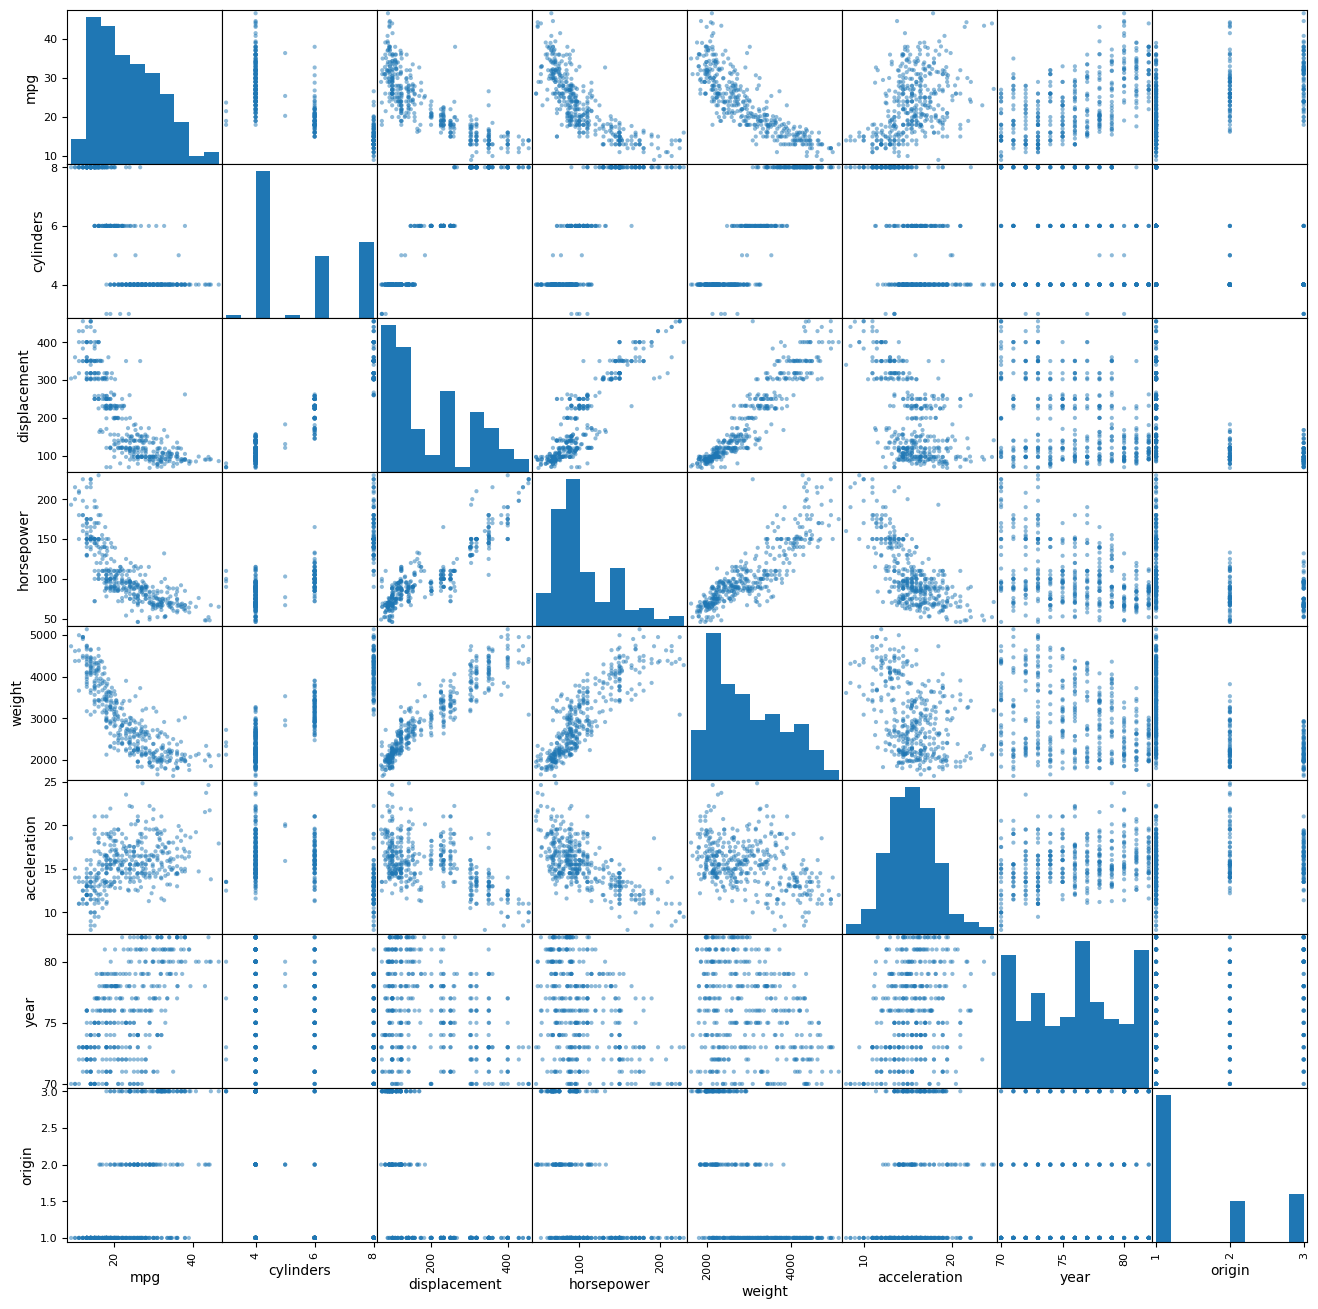

In [127]:
pd.plotting.scatter_matrix(Auto, figsize=(16, 16));

In [138]:
corr_auto = Auto.select_dtypes(include=['int64', 'float64']).corr()
for a, b in itertools.combinations(corr_auto.columns, 2):
    if corr_auto.loc[a, b] >= 0.9:
        print(f"{a} ↔ {b}: {corr_auto.loc[a, b]:.3f}")

cylinders ↔ displacement: 0.951
displacement ↔ weight: 0.933


In [139]:
corr_auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [143]:
Boston = load_data('Boston')
Boston.shape

(506, 13)

In [152]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


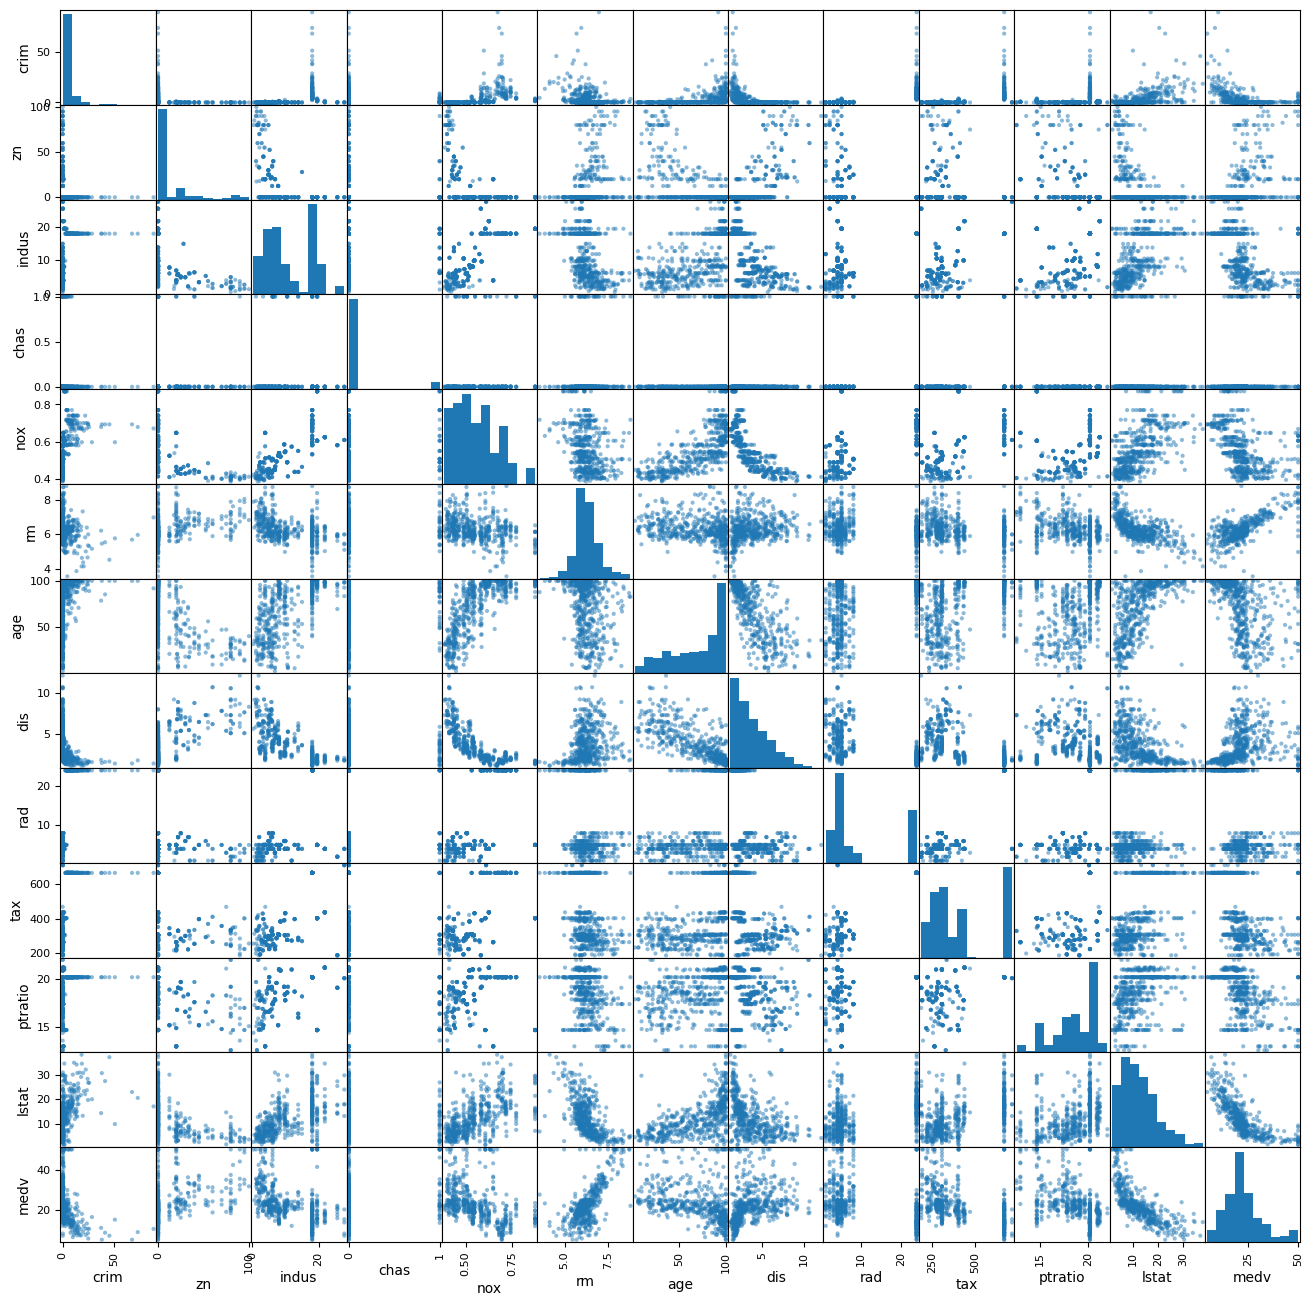

In [150]:
pd.plotting.scatter_matrix(Boston, figsize=(16, 16));

In [153]:
Boston.corrwith(Boston['crim'])

crim       1.000000
zn        -0.200469
indus      0.406583
chas      -0.055892
nox        0.420972
rm        -0.219247
age        0.352734
dis       -0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
lstat      0.455621
medv      -0.388305
dtype: float64

In [154]:
Boston.iloc[Boston['crim'].nlargest(10).index]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666,20.2,17.21,10.4
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666,20.2,20.62,8.8
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,22.98,5.0
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666,20.2,10.11,15.0
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666,20.2,36.98,7.0
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666,20.2,27.38,8.5
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,30.59,5.0
427,37.6619,0.0,18.1,0,0.679,6.202,78.7,1.8629,24,666,20.2,14.52,10.9
413,28.6558,0.0,18.1,0,0.597,5.155,100.0,1.5894,24,666,20.2,20.08,16.3
417,25.9406,0.0,18.1,0,0.679,5.304,89.1,1.6475,24,666,20.2,26.64,10.4


In [156]:
Boston['chas'].value_counts()[1]

np.int64(35)

In [157]:
Boston['ptratio'].median()

np.float64(19.05)

In [160]:
Boston['medv'].argmin()

np.int64(398)

In [163]:
Boston.loc[np.int64(398)]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [164]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [166]:
len(Boston[Boston['rm']>7])

64

In [169]:
Boston[Boston['rm']>8].describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,7.440000,50.000000
